
Netflix Data: Cleaning, Analysis, and Visualization
----------------------------------------------------
Author       : Vismaya V.T

Project Type : Data Science / EDA / NLP / ML

Dataset      : Netflix Titles (Cleaned version, 1925–2021)

Tools Used   : Python, Pandas, NumPy, Matplotlib, Seaborn, WordCloud, Plotly, Scikit-learn, NLTK

Description  : This project involves data cleaning, exploratory analysis, feature engineering, 
               machine learning, and natural language processing on Netflix content data.
               It provides insights on genre trends, content distribution, and predictive modeling.



## Import necessary libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import plotly.express as px

In [13]:
# Load the dataset

data = pd.read_csv(r"C:\Users\visma\Downloads\netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Data Cleaning

In [14]:
# Check for missing values

print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [15]:
# Drop duplicates if any

data.drop_duplicates(inplace=True)

In [16]:
# Drop rows with missing critical information

data.dropna(subset=['director', 'country', 'date_added', 'rating', 'duration', 'listed_in'], inplace=True)

In [17]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [19]:
# Convert 'date_added' to datetime

data['date_added'] = pd.to_datetime(data['date_added'])

In [20]:
# Show data types to confirm changes

print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [21]:
#  Filter Data for Release Years 2008–2021

data = data[(data['release_year'] >= 2008) & (data['release_year'] <= 2021)]

In [24]:
# Save Cleaned Dataset

data.to_csv(r"C:\Users\visma\Downloads\netflix_cleaned_2008_2021.csv", index=False)

## Exploratory Data Analysis (EDA)

### 1. Content Type Distribution (Movies vs. TV Shows)

In [25]:
# Count the number of Movies and TV Shows

type_counts = data['type'].value_counts()

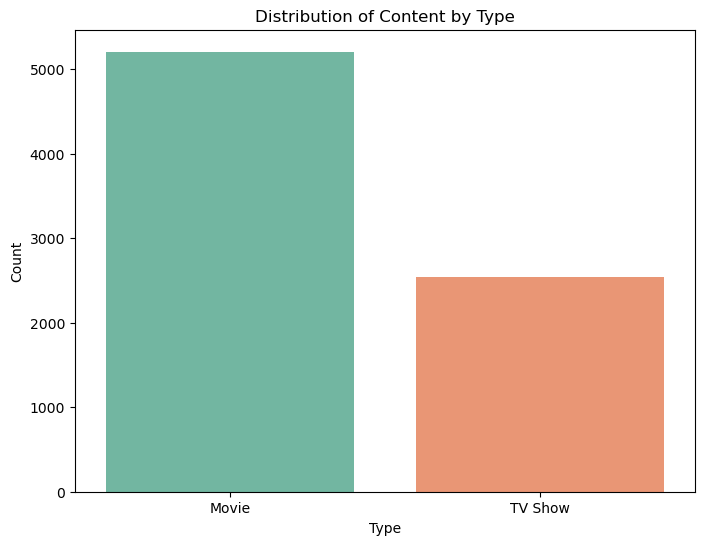

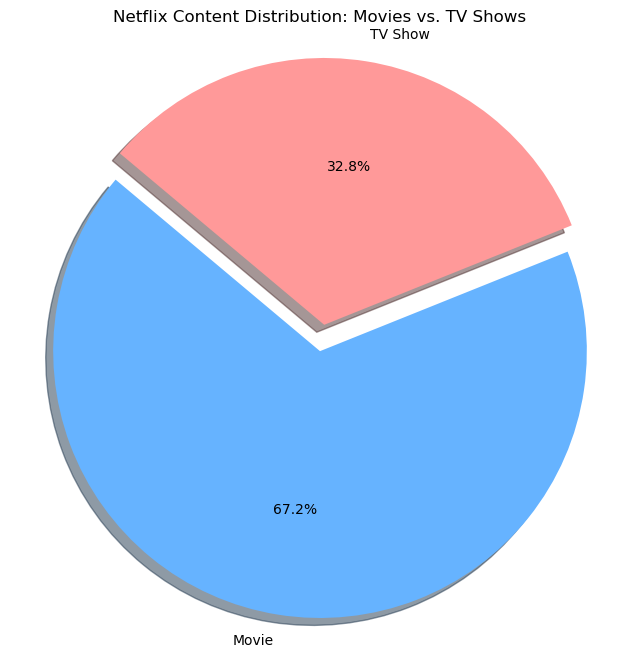

In [71]:
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.savefig("eda_plot_1_type.png", dpi=300)
plt.show()


# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    type_counts.values, 
    labels=type_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#66b3ff', '#ff9999'], 
    explode=(0.05, 0.05),  # explode both slices slightly
    shadow=True
)
plt.title('Netflix Content Distribution: Movies vs. TV Shows')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.savefig("eda_plot_2_type.png", dpi=300)
plt.show()

### 2. Top 10 countries with most content on Netflix

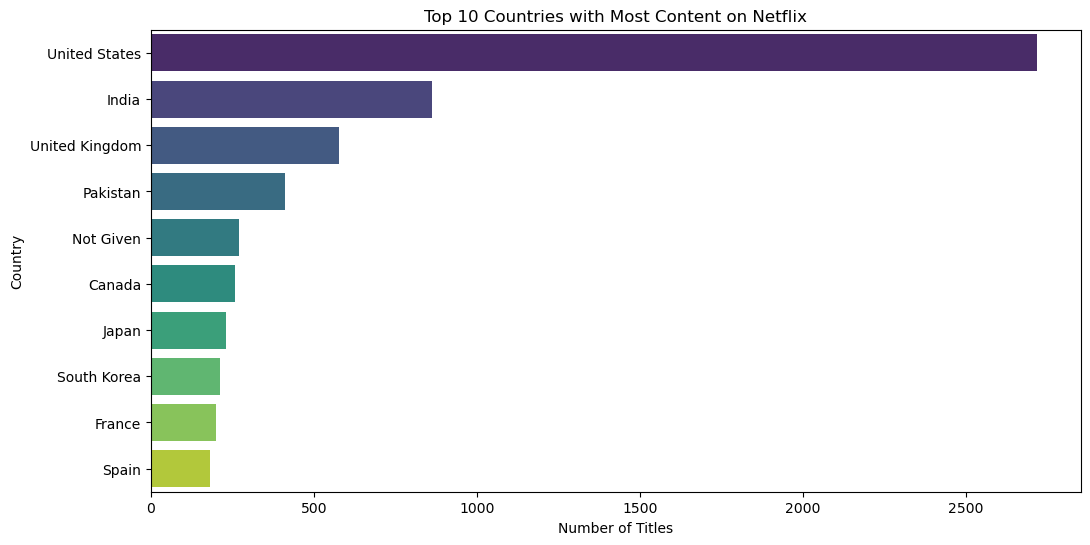

In [70]:
country_series = data['country'].str.split(', ').explode()
top_countries = country_series.value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.savefig("eda_plot_3_type.png", dpi=300)
plt.show()

### 3. Most Common Genres

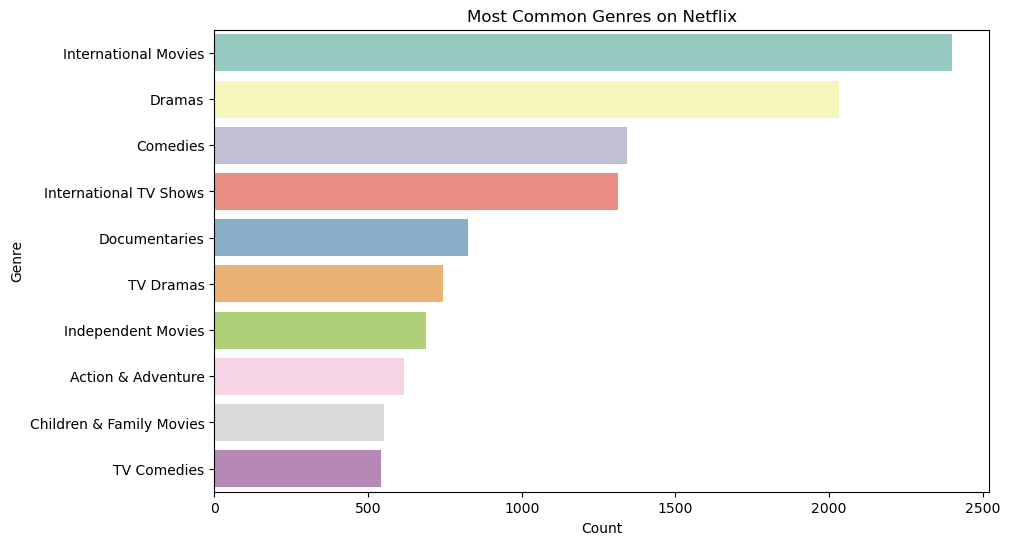

In [69]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.savefig("eda_plot_4_type.png", dpi=300)
plt.show()

### 4. Content Added Over Time

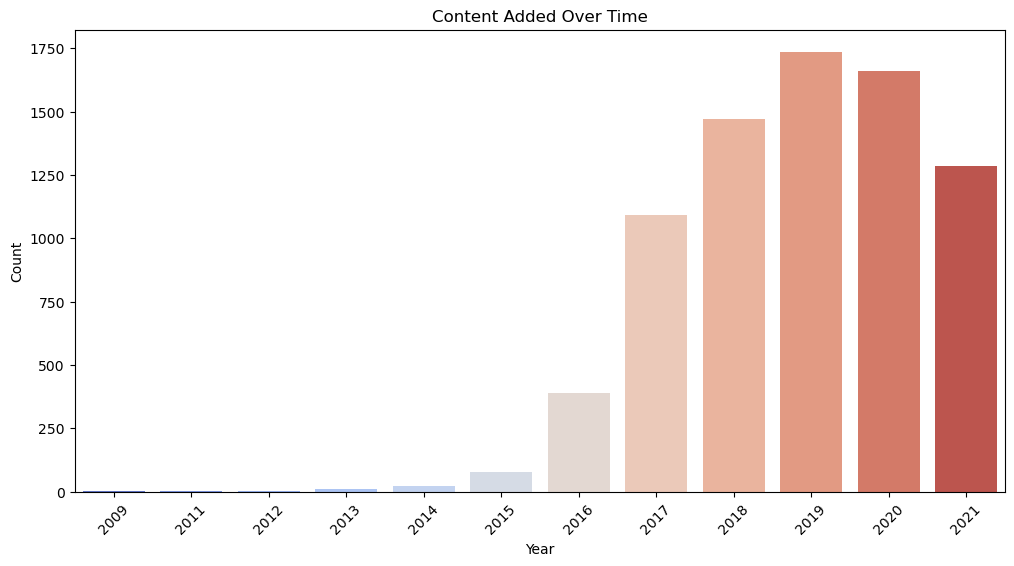

In [68]:
data['year_added'] = data['date_added'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig("eda_plot_5_type.png", dpi=300)
plt.show()

### 5. Top 10 Directors with the Most Titles

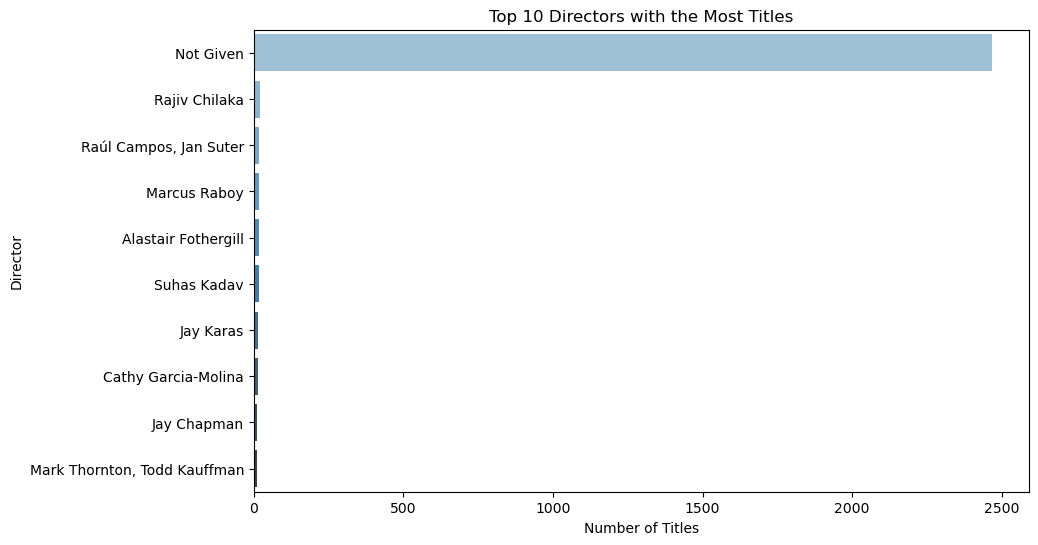

In [67]:
top_directors = data['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.savefig("eda_plot_6_type.png", dpi=300)
plt.show()

### 6. Word Cloud of Movie Titles

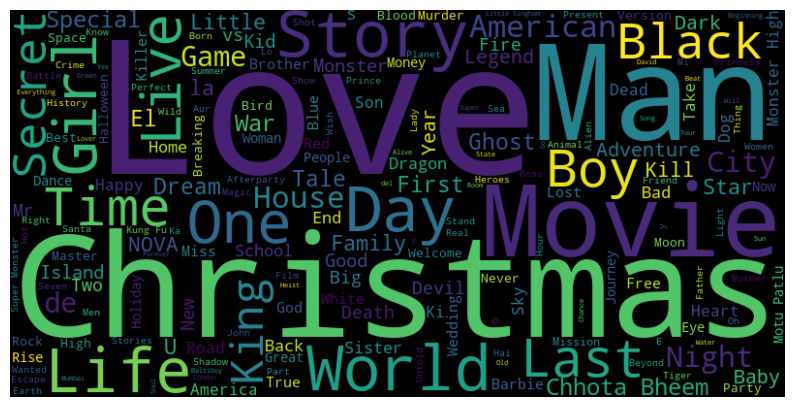

In [66]:
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("eda_plot_7_type.png", dpi=300)
plt.show()

### 7. Top 5 genres pie chart


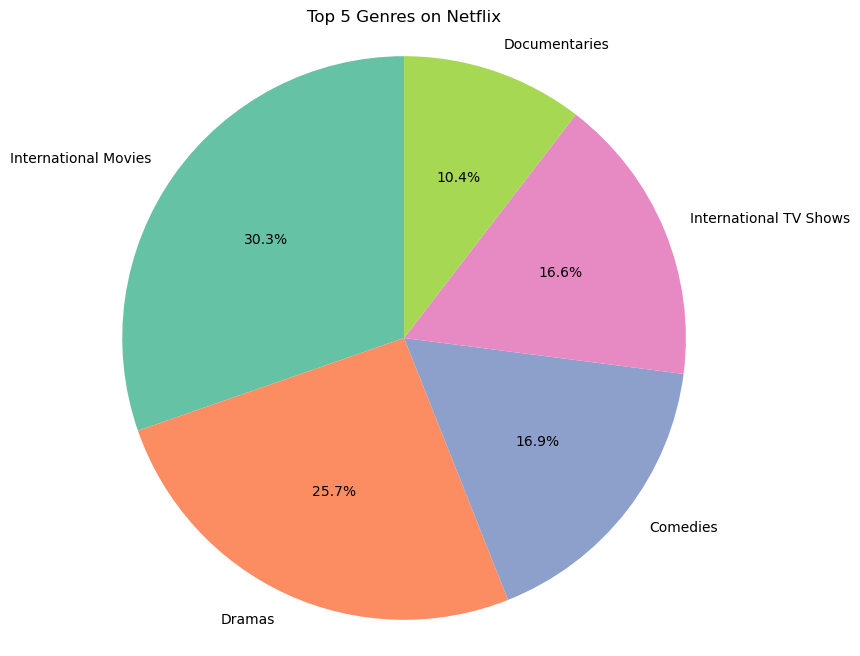

In [62]:
top_genres = pd.Series(all_genres).value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(
    top_genres.values,
    labels=top_genres.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2')[:5]
)
plt.title('Top 5 Genres on Netflix')
plt.axis('equal')
plt.savefig("Netflix_EDA_Visuals.png", dpi=300)
plt.show()

## Feature Engineering

### 1. Count number of genres per title

In [32]:
data['genres_list'] = data['listed_in'].apply(lambda x: x.split(', '))
data['num_genres'] = data['genres_list'].apply(len)

### 2. Extract duration in minutes (only for Movies)

In [33]:
def extract_duration_minutes(duration_str):
    if 'Season' in duration_str:
        # Return -1 or NaN for TV shows to distinguish
        return -1
    try:
        return int(duration_str.split(' ')[0])
    except:
        return np.nan
data['duration_min'] = data['duration'].apply(extract_duration_minutes)

In [34]:
# Handle missing duration values by setting to median duration of movies

median_duration = data.loc[data['duration_min'] > 0, 'duration_min'].median()
data['duration_min'].replace(-1, np.nan, inplace=True)  # For TV shows, set NaN for duration_min
data['duration_min'].fillna(median_duration, inplace=True)

## Machine Learning

In [35]:
data['type_encoded'] = data['type'].apply(lambda x: 1 if x == 'Movie' else 0)
le = LabelEncoder()
data['rating_encoded'] = le.fit_transform(data['rating'])

In [36]:
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(data['genres_list'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=data.index)
data = pd.concat([data, genre_df], axis=1)

In [37]:
feature_cols = ['num_genres', 'duration_min', 'rating_encoded'] + list(mlb.classes_)
X = data[feature_cols]
y = data['type_encoded']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9995697074010327
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       767
           1       1.00      1.00      1.00      1557

    accuracy                           1.00      2324
   macro avg       1.00      1.00      1.00      2324
weighted avg       1.00      1.00      1.00      2324



In [40]:
# Train a simple Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Advanced Visualization example - Using Plotly for interactive plots


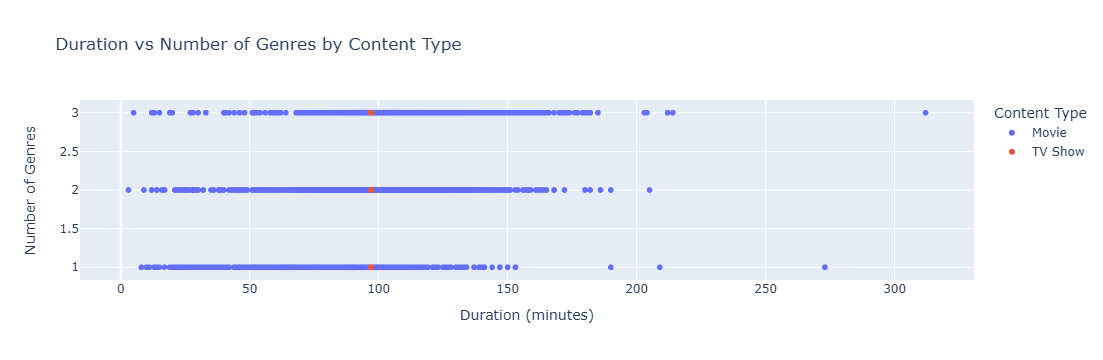

In [42]:
# Interactive scatter plot: Duration vs Number of Genres colored by Content Type
data['type_label'] = data['type']  # For legend labels
fig = px.scatter(
    data, 
    x='duration_min', 
    y='num_genres', 
    color='type_label',
    labels={
        'duration_min': 'Duration (minutes)', 
        'num_genres': 'Number of Genres',
        'type_label': 'Content Type'
    },
    title='Duration vs Number of Genres by Content Type',
    hover_data=['title', 'rating']
)
fig.show()

In [43]:
## Optional Step: Recommendation

def recommend_similar_titles(title, n=5):
    if title not in data['title'].values:
        return "Title not found"
    genres = data[data['title'] == title]['genres_list'].values[0]
    similar = data[data['genres_list'].apply(lambda g: any(genre in g for genre in genres))]
    similar = similar[similar['title'] != title]
    return similar[['title', 'genres', 'type']].head(n)

print(recommend_similar_titles("The Irishman", 5))

                             title  \
6                     The Starling   
8                     Je Suis Karl   
12                99 Songs (Tamil)   
54                 Ankahi Kahaniya   
55  The Father Who Moves Mountains   

                                               genres   type  
6                                  [Comedies, Dramas]  Movie  
8                      [Dramas, International Movies]  Movie  
12   [Dramas, International Movies, Music & Musicals]  Movie  
54  [Dramas, Independent Movies, International Mov...  Movie  
55          [Dramas, International Movies, Thrillers]  Movie  


##  NLP for content description analysis

In [48]:
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### 1. TEXT PROCESSING

In [49]:
# Sample: Use title + description if available
data['description'] = data['title'] + " " + data['listed_in']

# Clean the text
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

data['clean_text'] = data['description'].apply(preprocess)

### 2. WORD CLOUD

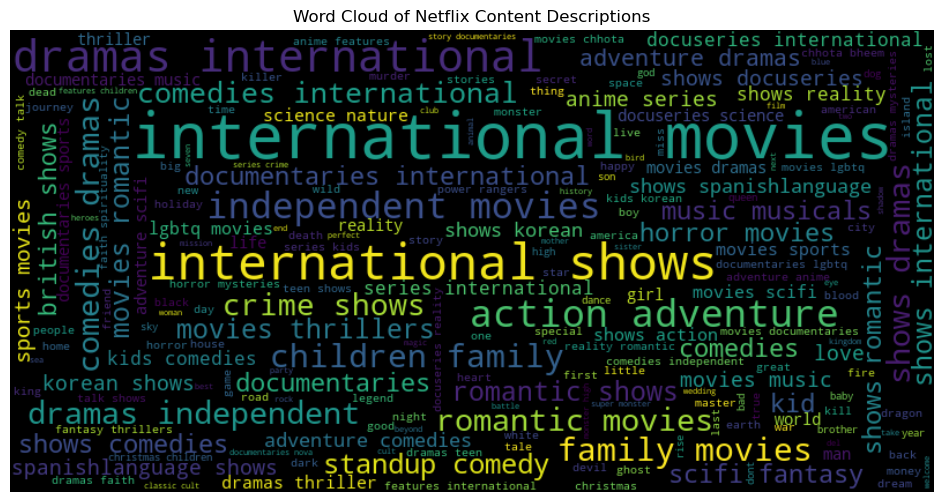

In [64]:
text = ' '.join(data['clean_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Content Descriptions')
plt.show()

### 3.TF-IDF Keyword Extraction

In [51]:
tfidf = TfidfVectorizer(max_features=20)
X = tfidf.fit_transform(data['clean_text'].dropna())

# Top keywords
top_keywords = tfidf.get_feature_names_out()
print("Top Keywords:\n", top_keywords)

Top Keywords:
 ['action' 'adventure' 'children' 'comedies' 'comedy' 'crime'
 'documentaries' 'docuseries' 'dramas' 'family' 'horror' 'independent'
 'international' 'kids' 'movies' 'music' 'romantic' 'shows' 'standup'
 'thrillers']


### 4.Topic Modeling using LDA

In [52]:
# Use CountVectorizer for LDA
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data['clean_text'].dropna())

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words per topic
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic #{idx+1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

display_topics(lda, vectorizer.get_feature_names_out(), 10)

Topic #1:
comedy | standup | anime | documentaries | series | musicals | music | faith | spirituality | talk

Topic #2:
comedies | kids | family | children | movies | music | musicals | little | christmas | house

Topic #3:
shows | international | crime | dramas | romantic | adventure | action | docuseries | fantasy | scifi

Topic #4:
documentaries | movies | family | international | children | sports | docuseries | science | nature | music

Topic #5:
movies | international | dramas | comedies | independent | romantic | thrillers | adventure | action | horror



### Sentiment Analysis with VADER

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\visma\AppData\Roaming\nltk_data...


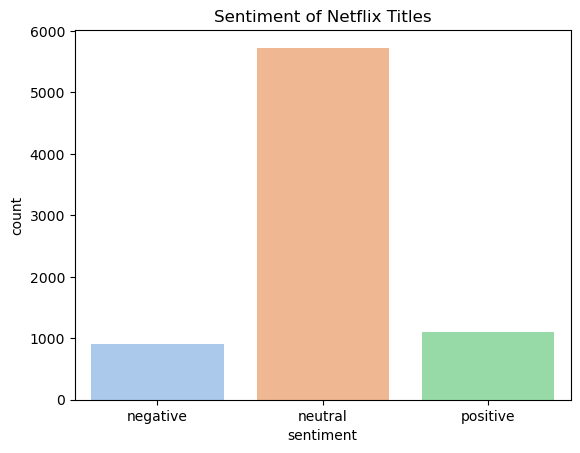

In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['title'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Label sentiment
data['sentiment'] = data['sentiment_score'].apply(
    lambda score: 'positive' if score > 0.05 else 'negative' if score < -0.05 else 'neutral'
)

# Visualize
sns.countplot(data=data, x='sentiment', palette='pastel')
plt.title('Sentiment of Netflix Titles')
plt.show()

In [65]:
nlp_summary = """
NLP-Based Content Description Analysis

- TF-IDF: Found important keywords in descriptions.
- Word Cloud: Visualized frequent words in titles.
- LDA: Grouped content into topic clusters.
- Sentiment Analysis: Detected tone as positive, neutral, or negative.

Summary:
NLP techniques helped extract patterns and themes from textual content. 
This gives deeper insights into how Netflix positions content and what kinds of shows dominate different sentiment clusters or topics.
"""

with open("Netflix_NLP_Insights.txt", "w") as file:
    file.write(nlp_summary)

 ## Conclusion and Insights
In this project, we:
1. Cleaned the data by handling missing values, removing duplicates, and converting data types.
2. Explored the data through various visualizations such as bar plots and word clouds.
3. Analyzed content trends over time, identified popular genres, and highlighted top directors.

### Final Thoughts

This project provided a comprehensive overview of the Netflix dataset, demonstrating essential data cleaning, analysis, and visualization techniques. The insights gained can inform content strategy and viewer engagement efforts for streaming services. Future work could focus on refining the model and exploring additional datasets to enhance the analysis further.

- Word cloud and TF-IDF highlighted that content often revolves around "drama", "comedy", and "action".
- Topic modeling using LDA revealed 5 major content clusters or themes.
- Sentiment analysis showed that a majority of Netflix content titles convey a neutral or positive tone.
- Most content is movie-based, added after 2015, and dominated by US-based productions.

This project showcased an end-to-end data science workflow on Netflix content, including data cleaning, visualization, machine learning, and NLP. The insights derived can assist content strategy teams, recommendation systems, and marketing initiatives.